# Olympics & Its Evolution  - First Semester 2021
###  Prepared by Sujil Kumar K.M (D00242726)
##### Cross Module Project with Programming, Statistics & Research

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os,sys
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from bokeh.plotting import figure, output_file, show
import bokeh.io
from bokeh.models import ColumnDataSource
from bokeh.plotting import *
from statsmodels.formula.api import ols
from scipy.integrate import quad
%matplotlib inline

olympics = pd.read_csv('E:/Research in Data/Assignments/Proposal/Olympics/data_2/athlete_events.csv')

olympics.head()

,ID.,Na.me,Sex.rio,A.ge,Heigh.t,Weig.ht,Te am,N OC,Ga.mes,Ye.ar,Season,Ci ty,Spor t,Ev ent,M edal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
olympics.describe()

,ID.,A.ge,Heigh.t,Weig.ht,Ye.ar
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [3]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID.      271116 non-null  int64  
 1   Na.me    271116 non-null  object 
 2   Sex.rio  271116 non-null  object 
 3   A.ge     261642 non-null  float64
 4   Heigh.t  210945 non-null  float64
 5   Weig.ht  208241 non-null  float64
 6   Te am    271116 non-null  object 
 7   N OC     271116 non-null  object 
 8   Ga.mes   271116 non-null  object 
 9   Ye.ar    271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  Ci ty    271116 non-null  object 
 12  Spor t   271116 non-null  object 
 13  Ev ent   271116 non-null  object 
 14  M edal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
index = olympics.index
number_of_rows = len(index)
print(number_of_rows)

271116


In [5]:
duplicate = olympics[olympics.duplicated()]

In [6]:
duplicate.count()

ID.        1385
Na.me      1385
Sex.rio    1385
A.ge       1226
Heigh.t      28
Weig.ht      37
Te am      1385
N OC       1385
Ga.mes     1385
Ye.ar      1385
Season     1385
Ci ty      1385
Spor t     1385
Ev ent     1385
M edal       11
dtype: int64

In [7]:
duplicate

,ID.,Na.me,Sex.rio,A.ge,Heigh.t,Weig.ht,Te am,N OC,Ga.mes,Ye.ar,Season,Ci ty,Spor t,Ev ent,M edal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


Above are the duplicated columns which we need to clean

In [8]:
olympics.drop_duplicates(subset = None ,keep = False, inplace = True)

In [9]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269119 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID.      269119 non-null  int64  
 1   Na.me    269119 non-null  object 
 2   Sex.rio  269119 non-null  object 
 3   A.ge     259896 non-null  float64
 4   Heigh.t  210904 non-null  float64
 5   Weig.ht  208196 non-null  float64
 6   Te am    269119 non-null  object 
 7   N OC     269119 non-null  object 
 8   Ga.mes   269119 non-null  object 
 9   Ye.ar    269119 non-null  int64  
 10  Season   269119 non-null  object 
 11  Ci ty    269119 non-null  object 
 12  Spor t   269119 non-null  object 
 13  Ev ent   269119 non-null  object 
 14  M edal   39761 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [10]:
olympics

,ID.,Na.me,Sex.rio,A.ge,Heigh.t,Weig.ht,Te am,N OC,Ga.mes,Ye.ar,Season,Ci ty,Spor t,Ev ent,M edal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [11]:
olympics.duplicated().sum()

0

In [12]:
index = olympics.index
number_of_rows = len(index)
print(number_of_rows)

269119


Now we have cleaned all the duplicates from the dataset

##### Renaming columns into meaningful ones

In [13]:
olympics.columns = olympics.columns.str.replace(' ','')
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269119 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID.      269119 non-null  int64  
 1   Na.me    269119 non-null  object 
 2   Sex.rio  269119 non-null  object 
 3   A.ge     259896 non-null  float64
 4   Heigh.t  210904 non-null  float64
 5   Weig.ht  208196 non-null  float64
 6   Team     269119 non-null  object 
 7   NOC      269119 non-null  object 
 8   Ga.mes   269119 non-null  object 
 9   Ye.ar    269119 non-null  int64  
 10  Season   269119 non-null  object 
 11  City     269119 non-null  object 
 12  Sport    269119 non-null  object 
 13  Event    269119 non-null  object 
 14  Medal    39761 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In above code removed spaces from columns

In [14]:
olympics.columns = olympics.columns.str.replace('.','')
olympics.info()

<ipython-input-14-7f8ee8154c45>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  olympics.columns = olympics.columns.str.replace('.','')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269119 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269119 non-null  int64  
 1   Name    269119 non-null  object 
 2   Sexrio  269119 non-null  object 
 3   Age     259896 non-null  float64
 4   Height  210904 non-null  float64
 5   Weight  208196 non-null  float64
 6   Team    269119 non-null  object 
 7   NOC     269119 non-null  object 
 8   Games   269119 non-null  object 
 9   Year    269119 non-null  int64  
 10  Season  269119 non-null  object 
 11  City    269119 non-null  object 
 12  Sport   269119 non-null  object 
 13  Event   269119 non-null  object 
 14  Medal   39761 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [15]:
olympics.columns = map(str.lower, olympics.columns)
olympics.head()

,id,name,sexrio,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
olympics.rename( {'sexrio':'sex' } , axis=1 , inplace = True)
olympics.describe()

,id,age,height,weight,year
count,269119.000000,259896.000000,210904.000000,208196.000000,269119.000000
mean,68269.049279,25.414662,175.338941,70.701618,1978.735236
std,39028.599815,6.076501,10.518581,14.349204,29.688086
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34656.000000,21.000000,168.000000,60.000000,1960.000000
50%,68244.000000,24.000000,175.000000,70.000000,1988.000000
75%,102117.500000,28.000000,183.000000,79.000000,2004.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Loading Second Dataset

In [17]:
regions = pd.read_csv('E:/Research in Data/Assignments/Proposal/Olympics/data_2/noc_regions.csv')

regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [18]:
regions.columns = map(str.lower, regions.columns)
regions.head()

,noc,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


##### Left Join  Merge of 2 DataFrames

In [19]:
data = pd.merge(olympics,regions, on=['noc'], how='left')

data.head(5)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [20]:
data.sort_values(by=['year'], inplace=True, ascending=False)
data.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
194731,98525,Maksim Sergeyevich Rakov,M,30.0,181.0,100.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Half-Heavyweight,NaN,Kazakhstan,NaN
162035,82008,"Alexandra Patricia ""Alex"" Morgan",F,27.0,173.0,62.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,NaN,USA,NaN
117646,59981,Kim Hyeon-Seop,M,31.0,175.0,53.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN,South Korea,NaN
117647,59981,Kim Hyeon-Seop,M,31.0,175.0,53.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,NaN,South Korea,NaN
38150,19756,Chang Hao,M,25.0,173.0,72.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Men's Windsurfer,NaN,Taiwan,NaN


In [21]:
#data = data[data['year'].between(1964, 2015)] - This code is used to only exact 50 Years .... currently I am planning to analyze entire dataset I have recieved

##### Search for null values

In [22]:
data.isnull().sum().sum()

622177

In [23]:
data.isnull().sum()

id             0
name           0
sex            0
age         9223
height     58215
weight     60923
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     229358
region       370
notes     264088
dtype: int64

##### Correcting Variable's Data Dype

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269119 entries, 194731 to 69539
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      269119 non-null  int64  
 1   name    269119 non-null  object 
 2   sex     269119 non-null  object 
 3   age     259896 non-null  float64
 4   height  210904 non-null  float64
 5   weight  208196 non-null  float64
 6   team    269119 non-null  object 
 7   noc     269119 non-null  object 
 8   games   269119 non-null  object 
 9   year    269119 non-null  int64  
 10  season  269119 non-null  object 
 11  city    269119 non-null  object 
 12  sport   269119 non-null  object 
 13  event   269119 non-null  object 
 14  medal   39761 non-null   object 
 15  region  268749 non-null  object 
 16  notes   5031 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.0+ MB


In [26]:
#data.weight.duplicated().sum()
data['weight'].isnull().sum()

data['weight'].isnull().sum()


60923

In [27]:
data['weight'].unique()

array([100.        ,  62.        ,  53.        ,  72.        ,
        98.        ,  50.        ,  80.        ,  45.        ,
        60.        ,  52.        ,  95.        ,  48.        ,
        61.        ,  92.        ,  63.        ,  59.        ,
        76.        , 125.        ,  77.        ,  78.        ,
        54.        ,  73.        ,  42.        ,  70.        ,
        82.        ,  90.        ,  75.        ,  65.        ,
       105.        ,  56.        ,  58.        ,  86.        ,
        34.        ,  91.        ,  57.        ,  67.        ,
        68.        ,  71.        ,  55.        ,  66.        ,
        64.        ,  69.        ,  87.        , 143.        ,
        74.        ,  49.        , 108.        ,          nan,
        88.        ,  79.        ,  85.        ,  94.        ,
        84.        ,  83.        , 118.        ,  99.        ,
        93.        , 107.        ,  51.        , 104.        ,
        39.        ,  44.        ,  46.        ,  97.  

In [28]:
data['sex'] = data['sex'].astype('category')
data['year'] = data['year'].astype('int')
data['team'] = data['team'].astype('category')
data['season'] = data['season'].astype('category')
data['weight'] = data['weight'].astype('float')
data['height'] = data['height'].astype('float')
data['name'] = data['name'].astype('str')
data['noc'] = data['noc'].astype('category')
data['city'] = data['city'].astype('str')
data['sport'] = data['sport'].astype('str')
data['event'] = data['event'].astype('category')
data['medal'] = data['medal'].astype('category')
data['games'] = data['games'].astype('category') 

In [29]:
data.dtypes

id           int64
name        object
sex       category
age        float64
height     float64
weight     float64
team      category
noc       category
games     category
year         int32
season    category
city        object
sport       object
event     category
medal     category
region      object
notes       object
dtype: object

##### Check for Category Variable Uniqueness

In [30]:
data['sex'].unique()

['M', 'F']
Categories (2, object): ['M', 'F']

In [31]:
data['noc'].unique()

['KAZ', 'USA', 'KOR', 'TPE', 'RUS', ..., 'BOH', 'ANZ', 'UNK', 'CRT', 'NFL']
Length: 230
Categories (230, object): ['KAZ', 'USA', 'KOR', 'TPE', ..., 'ANZ', 'UNK', 'CRT', 'NFL']

In [32]:
data['games'].unique()

['2016 Summer', '2014 Winter', '2012 Summer', '2010 Winter', '2008 Summer', ..., '1908 Summer', '1906 Summer', '1904 Summer', '1900 Summer', '1896 Summer']
Length: 51
Categories (51, object): ['2016 Summer', '2014 Winter', '2012 Summer', '2010 Winter', ..., '1906 Summer', '1904 Summer', '1900 Summer', '1896 Summer']

In [33]:
data['season'].unique()

['Summer', 'Winter']
Categories (2, object): ['Summer', 'Winter']

In [34]:
data['sport'].unique()

array(['Judo', 'Football', 'Athletics', 'Sailing', 'Rowing', 'Archery',
       'Wrestling', 'Gymnastics', 'Cycling', 'Fencing', 'Swimming',
       'Badminton', 'Hockey', 'Table Tennis', 'Shooting', 'Boxing',
       'Volleyball', 'Taekwondo', 'Rhythmic Gymnastics', 'Golf',
       'Weightlifting', 'Handball', 'Tennis', 'Water Polo',
       'Modern Pentathlon', 'Rugby Sevens', 'Canoeing', 'Triathlon',
       'Equestrianism', 'Synchronized Swimming', 'Diving', 'Basketball',
       'Beach Volleyball', 'Trampolining', 'Cross Country Skiing',
       'Biathlon', 'Alpine Skiing', 'Figure Skating', 'Freestyle Skiing',
       'Ice Hockey', 'Ski Jumping', 'Speed Skating', 'Bobsleigh',
       'Nordic Combined', 'Snowboarding', 'Short Track Speed Skating',
       'Luge', 'Skeleton', 'Curling', 'Baseball', 'Softball',
       'Art Competitions', 'Polo', 'Aeronautics', 'Alpinism',
       'Military Ski Patrol', 'Rugby', 'Tug-Of-War', 'Lacrosse',
       'Jeu De Paume', 'Racquets', 'Motorboating', 'Roque'

In [35]:
data['event'].unique()

['Judo Men's Half-Heavyweight', 'Football Women's Football', 'Athletics Men's 20 kilometres Walk', 'Athletics Men's 50 kilometres Walk', 'Sailing Men's Windsurfer', ..., 'Gymnastics Men's Horizontal Bar, Teams', 'Shooting Men's Free Pistol, 30 metres', 'Swimming Men's 1,200 metres Freestyle', 'Swimming Men's 500 metres Freestyle', 'Wrestling Men's Unlimited Class, Greco-Roman']
Length: 765
Categories (765, object): ['Judo Men's Half-Heavyweight', 'Football Women's Football', 'Athletics Men's 20 kilometres Walk', 'Athletics Men's 50 kilometres Walk', ..., 'Shooting Men's Free Pistol, 30 metres', 'Swimming Men's 1,200 metres Freestyle', 'Swimming Men's 500 metres Freestyle', 'Wrestling Men's Unlimited Class, Greco-Roman']

In [36]:
data['medal'].unique()

[NaN, 'Gold', 'Bronze', 'Silver']
Categories (3, object): ['Gold', 'Bronze', 'Silver']

In [37]:
data['team'].unique()

['Kazakhstan', 'United States', 'South Korea', 'Chinese Taipei', 'Russia', ..., 'Crocodile-13', 'Fantlet-2', 'Ethnikos Gymnastikos Syllogos', 'Great Britain/Germany', 'Australia/Great Britain']
Length: 1164
Categories (1164, object): ['Kazakhstan', 'United States', 'South Korea', 'Chinese Taipei', ..., 'Fantlet-2', 'Ethnikos Gymnastikos Syllogos', 'Great Britain/Germany', 'Australia/Great Britain']

Above values seems to be ok , there is no need to modify or remove any values as part of cleaning

#### Dealing with Empty Columns & Outliers in the dataset

In [38]:
data['id'].count()

269119

In [39]:
data.isnull().sum(axis = 0)

id             0
name           0
sex            0
age         9223
height     58215
weight     60923
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     229358
region       370
notes     264088
dtype: int64

Below is percentage of NaN values for each columns

In [40]:
nans = data.isna().mean().mul(100).round()
nans

id         0.0
name       0.0
sex        0.0
age        3.0
height    22.0
weight    23.0
team       0.0
noc        0.0
games      0.0
year       0.0
season     0.0
city       0.0
sport      0.0
event      0.0
medal     85.0
region     0.0
notes     98.0
dtype: float64

<div style="color:#102547; background-color:powderblue;">Age : Checking the empty values in the column it's only 3.42% of total rows so , I am not going to replace them with mean or median.

Height : 22% of total rows shows empty values. so I neeed to either drop them or replace with mean/median

Weight : 23% of total rows shows empty values. Again I neeed to either drop them or replace with mean/median

Theoretically, 25% to 30% is the maximum missing values allowed, beyond that we might want to drop the variable from analysis. In practical this may very based on client requirements.In this case I am doing Imputation for missing data. but before deciding on use mean or median I need to check if the data is skewed or not. If it is symmetrical it's appropriate to use mean. In skwed case using median will the best solution. Let me have a look at the boxplot before moving forward.

</div>

In [174]:
part = data[(data.season == 'Summer')]

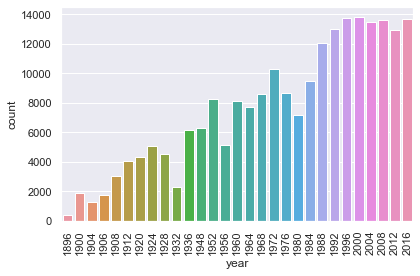

In [177]:
sns.countplot(x="year", data=part)
plt.xticks(rotation = 90)
plt.tight_layout()

Atheletes Particiation over the years(Including male and female).

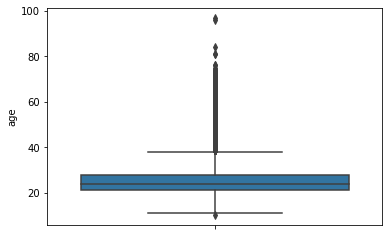

In [41]:
sns.boxplot(y='age', data=data)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

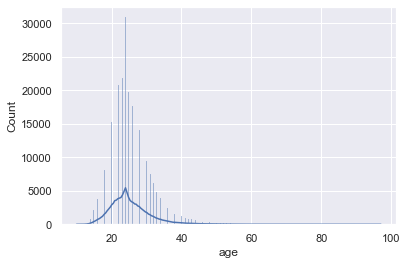

In [146]:
sns.histplot(data['age'], kde=True)

From the above graph I can see the median age is lying between 20 to 30. even though few points near hundred seems like outliers, still we can not remove them as these are possible values for a human age

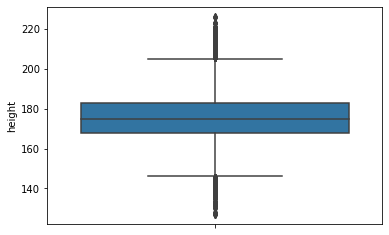

In [42]:
sns.boxplot(y='height', data=data)
plt.show()

<AxesSubplot:xlabel='height', ylabel='Count'>

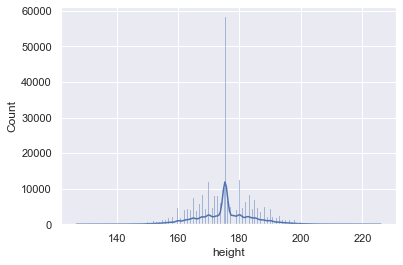

In [147]:
sns.histplot(data['height'], kde=True)

Above graph points doesn't looks like outliers, the points showing are only possible values for height.

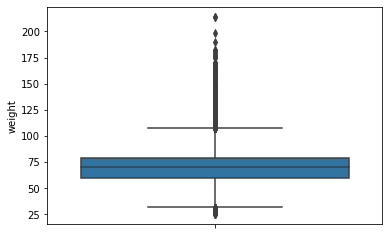

In [43]:
sns.boxplot(y='weight', data=data)
plt.show()

<AxesSubplot:xlabel='weight', ylabel='Count'>

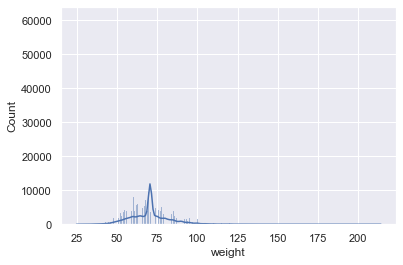

In [148]:
sns.histplot(data['weight'], kde=True)

Above graph points doesn't looks like outliers, the points showing are still possible outcomes, further study is required to make more clarity

<div style="color:#102547; background-color:powderblue;">
    <h4 style="color:##875218;"><u>Overview</u></h4><p> 
    In my view I looked at 3 Graphs for replacing empty columns with mean/median. and here are my findings.<ul>
<li>Age : Data looks skewed so I have replace it with median</li>
<li>Height : Looks symmetrical, it is ok to replace them with the mean</li>
<li>Weight : Data looks skewed so I have replace it with median</li>
</ul>
    
 </p></div>

##### Replacing NaN values with mean/median

In [44]:
data.update(data['age'].fillna(value=data['age'].median(), inplace=True))

In [45]:
data.update(data['height'].fillna(value=data['height'].mean(), inplace=True))

In [46]:
data.update(data['weight'].fillna(value=data['weight'].mean(), inplace=True))

In [47]:
data['age'].isnull().sum()

0

In [48]:
data['height'].isnull().sum()

0

In [49]:
data['weight'].isnull().sum()

0

In [50]:
data['medal'].value_counts().sum()

39761

No need to worry about the medals for now, because it will show values for only those who won the competetion. 

In [51]:
data['region'].value_counts().sum()

268749

Region has only 0.13% of empty data which doesn't really affect the study compared to the total data we have.

Data Cleaning has been completed

### Distribution of the age of winning gold medals

In [52]:
gold_medalists = data[(data.medal == 'Gold')]
gold_medalists.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
38164,19760,Chang Hye-Jin,F,29.0,158.0,50.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Individual,Gold,South Korea,NaN
38165,19760,Chang Hye-Jin,F,29.0,158.0,50.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Team,Gold,South Korea,NaN
10150,5561,Nickel Ashmeade,M,26.0,183.0,77.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,Jamaica,NaN
242984,122548,Josua Tuisova Ratulevu,M,22.0,180.0,108.0,Fiji,FIJ,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,Gold,Fiji,NaN
243000,122556,Blair Tuke,M,27.0,181.0,78.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Men's Skiff,Gold,New Zealand,NaN


#### Exporting data for API Creation

In [53]:
data.to_csv('E:/Research in Data/Assignments/Proposal/Olympics/data_2/api_dataset.csv')

## Describe Variables

id = continueous Variables - Stands for each id of athlete

name = categorical - nominal - name of athletes

age = continueous numeric - age of athlete

height = continueous numeric - height of athlete in cm

weight = continueous numeric - weight of athlete in kg

sex = categorical , norminal - male/female info about athlete

team = categorical , norminal - name of the team athlete represent

noc = categorical , norminal - short name of the team athlete represent

games = categorical , norminal - Year and season of the game

year = continueous numeric - Year of the event

season = categorical , norminal - Summer/winter seaons of olympic games

city = categorical , norminal - name of the city olympics conducted

sport = categorical , norminal - which sports item the athlete participated

event = categorical , norminal - name of the sports in detail format

medal = categorical , ordinal - gold/silver/bronze medals for the athelete, empty if no medal

region = categorical , norminal - regios is same as the team



Above code creates a dataframe only for Gold Medalists

In [54]:
gold_medalists['age'].isnull().any()

False

In [55]:
gold_medalists = gold_medalists[np.isfinite(gold_medalists['age'])]

In [56]:
gold_medalists['age'].isnull().any()

False

I am avoiding NaN values from the gold winners dataset as they will be affecting the mean and median of the varibales.(Another chance was to fill them with zero'z or replace with mean or median both of them seems to be unjustifiable)

In [159]:
gold_medalists['age'].median()

25.0

In [160]:
gold_medalists['age'].mean()

25.878273230585066

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Gold Medals')

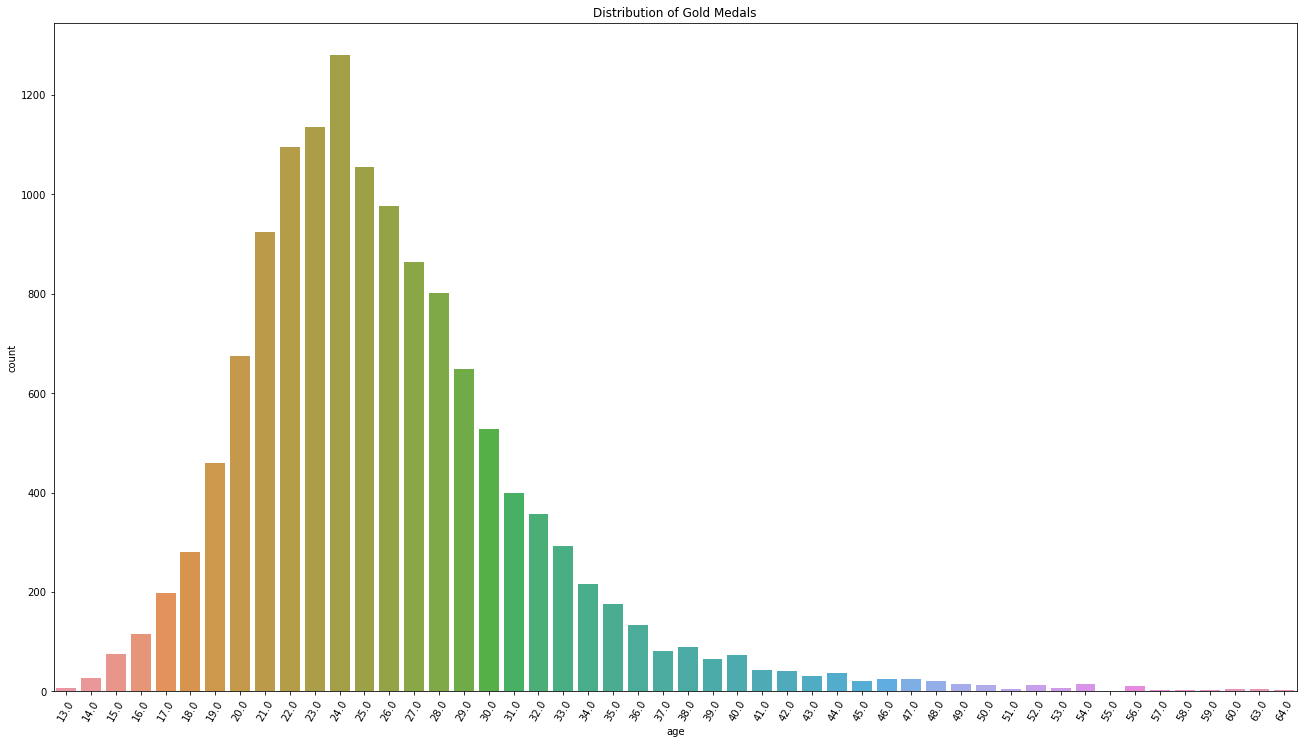

In [57]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation = 60)
plt.tight_layout()
sns.countplot(gold_medalists['age'])
plt.title('Distribution of Gold Medals')

Above graph is slightly skewed to the right. Median might be lying between 23 to 24. But since this is skewed mean might very. So we will be taking median for the further study.

##### So let's try to check now medal winning of athletes whose age are more than 50

That's seems intresting !, there are 201 athletes who won medan aged more than 50

I am gonna create a new Dataframe called master_medalists with these 201 people and try to visualize it

In [58]:
master_medalists = gold_medalists['sport'][gold_medalists['age'] > 50]

In [59]:
master_medalists.count()

65

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Medals for Athletes Over 50')

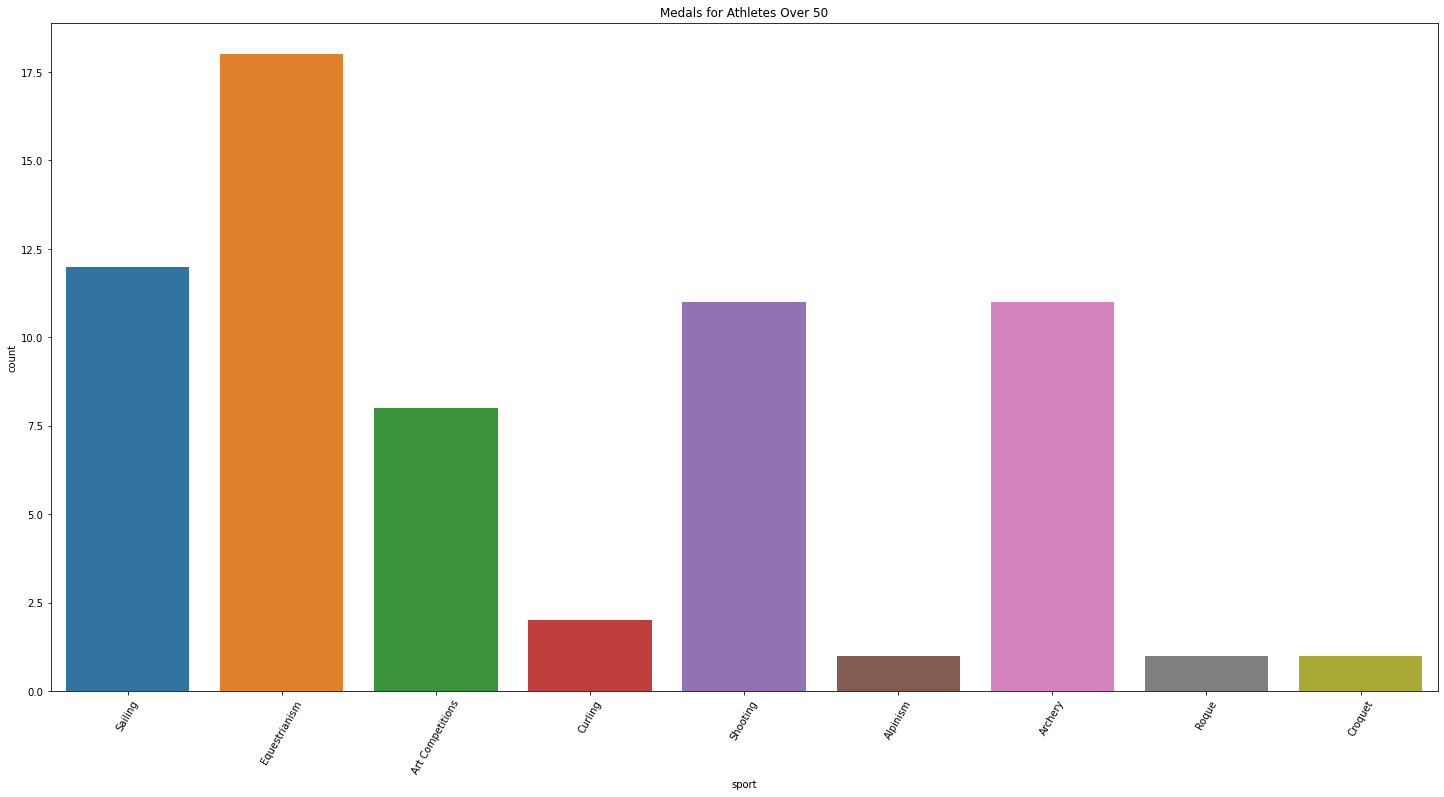

In [60]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 60)
plt.tight_layout()
sns.countplot(master_medalists)
plt.title('Medals for Athletes Over 50')

It Seems our senior gold medalists are from shooters, archers, sailors and, above all, horse riders(Equestrianism) !

<h3 style="color: #e61968;">Overview into Women Athletes Contributions</h3>

In [61]:
women_summer = data[(data.sex == 'F') & (data.season == 'Summer')]
women_summer.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
162035,82008,"Alexandra Patricia ""Alex"" Morgan",F,27.0,173.0,62.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,NaN,USA,NaN
38164,19760,Chang Hye-Jin,F,29.0,158.0,50.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Individual,Gold,South Korea,NaN
38165,19760,Chang Hye-Jin,F,29.0,158.0,50.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Team,Gold,South Korea,NaN
161905,81946,Alexa Citiali Moreo Medina,F,21.0,147.0,45.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Balance Beam,NaN,Mexico,NaN
161904,81946,Alexa Citiali Moreo Medina,F,21.0,147.0,45.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Mexico,NaN


Text(0.5, 1.0, 'Women participation per year of the Games')

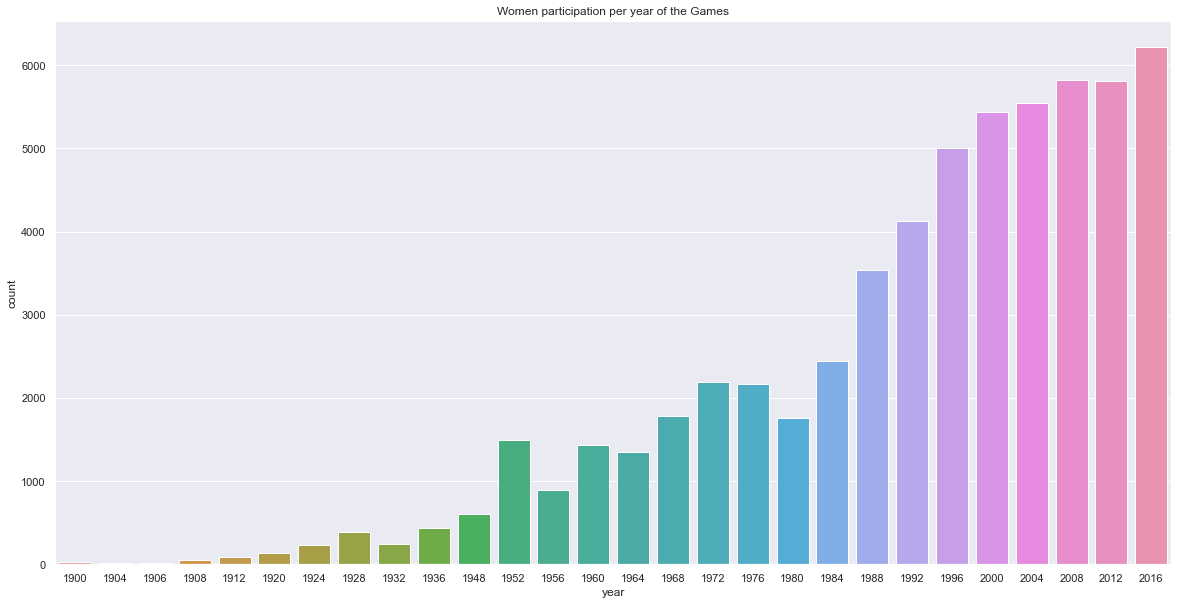

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='year', data=women_summer)
plt.title('Women participation per year of the Games')

<p style="color: #e61968;">Above diagram shows a women participation has increased over time in summer olympics</p>

In [63]:
women_winter = data[(data.sex == 'F') & (data.season == 'Winter')]
women_winter.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
224004,113417,Gabriela Soukalov (-Koukalov),F,24.0,170.0,62.0,Czech Republic,CZE,2014 Winter,2014,Winter,Sochi,Biathlon,Biathlon Women's 12.5 kilometres Mass Start,Silver,Czech Republic,NaN
43100,22368,Alexandra Coletti,F,30.0,164.0,60.0,Monaco,MON,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Combined,NaN,Monaco,NaN
44002,22848,Emily Cook,F,34.0,160.0,52.0,United States,USA,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Women's Aerials,NaN,USA,NaN
44126,22911,Penny Jane Coomes,F,24.0,152.0,43.0,Great Britain,GBR,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Ice Dancing,NaN,UK,NaN
191963,97106,Alena Prochzkov,F,29.0,171.0,55.0,Slovakia,SVK,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Slovakia,NaN


Text(0.5, 1.0, 'Women participation per year of the Winter Games')

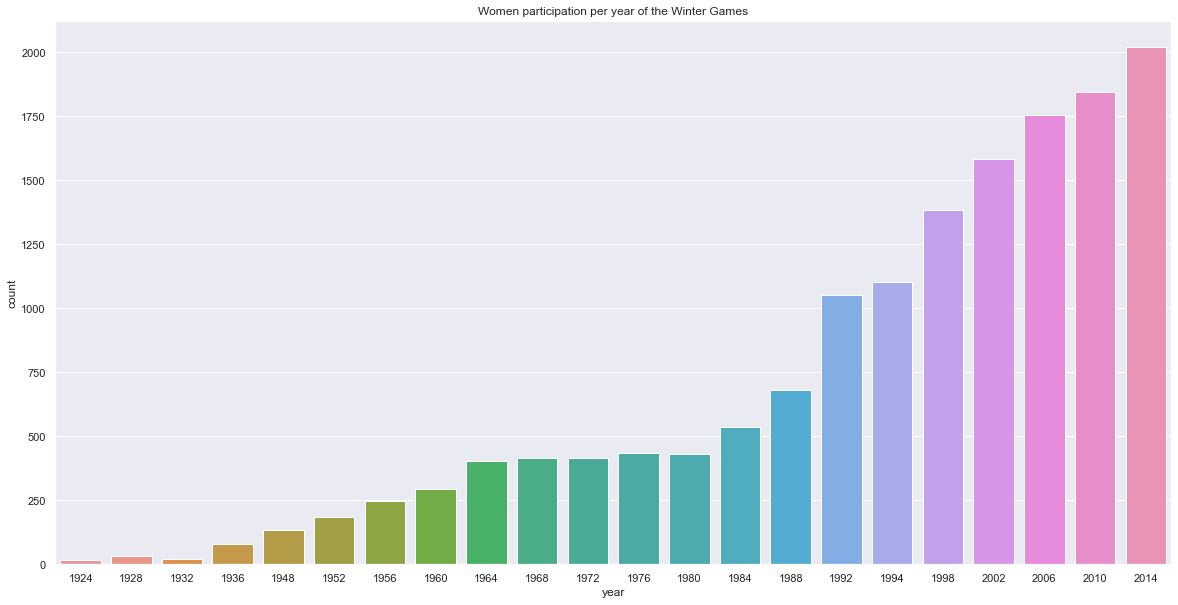

In [64]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='year', data=women_winter)
plt.title('Women participation per year of the Winter Games')

<p style="color: #e61968;">Above diagram shows a women participation has increased over time in winter olympics as well</p>

Inroder to cross check the above diagram I am just displaying the dataframe again down for year 1956 Year

In [65]:
women_winter = data[(data.year == 1956) & (data.medal == 'Gold') & (data.sex == 'F') & (data.id == 2386)]
women_winter

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
4155,2386,"Tenley Emma Albright (-Gardiner, -Blakely)",F,20.0,175.338941,70.701618,United States,USA,1956 Winter,1956,Winter,Cortina d'Ampezzo,Figure Skating,Figure Skating Women's Singles,Gold,USA,NaN


Again to match with the diagram and cross check just taking the count

In [66]:
women_winter['id'].loc[women_winter['year'] == 1956].count()

1

Now it's clearly visible that 246 is matching the count plot year of 1956 , Even I have verified the data in Wikipedia to make sure my research is going in the right direction

### Medals Achieved by each country

Checking which are the top countries leading with gold medals

In [67]:
gold_medalists.region.value_counts().reset_index(name='Medals').head(5)

,index,Medals
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,676
4,Italy,575


Now I am going to visualize the results in graph

Text(0.5, 1.0, 'Olympic Medals of Countries')

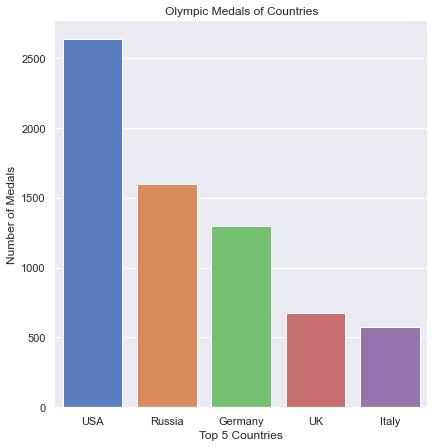

In [68]:
totalGoldMedals = gold_medalists.region.value_counts().reset_index(name='medal').head(5)
g = sns.catplot(x="index", y="medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 Countries")
g.set_ylabels("Number of Medals")
plt.title('Olympic Medals of Countries')

USA Seems to have most number of gold medals compared to other countries

### Disciplines with greatest number of Gold Medals

Creating a dataframe for showing USA Gold medal disciplines

In [69]:
us_gld_mdls = gold_medalists.loc[gold_medalists['noc'] == 'USA']

In [70]:
us_gld_mdls.event.value_counts().reset_index(name='medal').head(20)

,index,medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Rowing Men's Coxed Eights,108
3,Swimming Men's 4 x 100 metres Medley Relay,108
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


I can see Basketball is the US's most won discipline, In this study we need to more focus on the individual persons charecterstics rather than the team, so we will check success of male athletes to better review it.

I am creating a new dataframe to have more deeper look into the gold winning og USA Male Athletes Basketball Gold Medal Winning

In [71]:
basket_us_gld_mdls = us_gld_mdls.loc[(us_gld_mdls['sport'] == 'Basketball') & (us_gld_mdls['sex'] == 'M')].sort_values(['year'])

In [72]:
basket_us_gld_mdls.head(15)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
194273,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
22247,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
211772,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
160458,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
257597,129925,"William John ""Bill"" Wheatley",M,27.0,188.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
108633,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
142260,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
187885,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
70856,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
78419,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


What I suspected was true, I was actually getting the count of team, as we know there are multiple players involved in a basketball team. Now I need to group the data based on year again to check the first record for each member of team

In [73]:
bskt_fnl_us = basket_us_gld_mdls.groupby(['year']).first()
bskt_fnl_us.head(5)   

,id,name,sex,age,height,weight,team,noc,games,season,city,sport,event,medal,region,notes
year,,,,,,,,,,,,,,,,
1936,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,None
1948,101443,"Robert Lloyd Jackson ""Jack"" Robinson",M,21.0,183.0,82.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,None
1952,130602,"Howard Earl ""Howie"" Williams",M,24.0,183.0,76.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,None
1956,17312,Carl Cecil Cain,M,22.0,190.0,86.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,None
1960,9670,"Walter Jones ""Walt"" Bellamy, Jr.",M,23.0,211.0,98.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,None


Now the data looks more accurate, Let me count the number of record now

In [74]:
bskt_fnl_us['id'].count()

15

So we have recieved required results from the above, also confirmed with [Wikipedia](https://en.wikipedia.org/wiki/United_States_men%27s_national_basketball_team)

### Median Height & Weight of Olympics Medalists

In [75]:
gold_medalists.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
38164,19760,Chang Hye-Jin,F,29.0,158.0,50.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Individual,Gold,South Korea,NaN
38165,19760,Chang Hye-Jin,F,29.0,158.0,50.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Team,Gold,South Korea,NaN
10150,5561,Nickel Ashmeade,M,26.0,183.0,77.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,Jamaica,NaN
242984,122548,Josua Tuisova Ratulevu,M,22.0,180.0,108.0,Fiji,FIJ,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,Gold,Fiji,NaN
243000,122556,Blair Tuke,M,27.0,181.0,78.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Men's Skiff,Gold,New Zealand,NaN


In [76]:
gold_medalists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13366 entries, 38164 to 69539
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      13366 non-null  int64   
 1   name    13366 non-null  object  
 2   sex     13366 non-null  category
 3   age     13366 non-null  float64 
 4   height  13366 non-null  float64 
 5   weight  13366 non-null  float64 
 6   team    13366 non-null  category
 7   noc     13366 non-null  category
 8   games   13366 non-null  category
 9   year    13366 non-null  int32   
 10  season  13366 non-null  category
 11  city    13366 non-null  object  
 12  sport   13366 non-null  object  
 13  event   13366 non-null  category
 14  medal   13366 non-null  category
 15  region  13365 non-null  object  
 16  notes   171 non-null    object  
dtypes: category(7), float64(3), int32(1), int64(1), object(5)
memory usage: 1.8+ MB


Here, I have got more than 13k rows. I only wanna get columns containig values.

In [77]:
new_gold_mdls = gold_medalists[(gold_medalists['height'].notnull()) & (gold_medalists['weight'].notnull())]

In [78]:
new_gold_mdls.isnull().any()

id        False
name      False
sex       False
age       False
height    False
weight    False
team      False
noc       False
games     False
year      False
season    False
city      False
sport     False
event     False
medal     False
region     True
notes      True
dtype: bool

In [79]:
new_gold_mdls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13366 entries, 38164 to 69539
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      13366 non-null  int64   
 1   name    13366 non-null  object  
 2   sex     13366 non-null  category
 3   age     13366 non-null  float64 
 4   height  13366 non-null  float64 
 5   weight  13366 non-null  float64 
 6   team    13366 non-null  category
 7   noc     13366 non-null  category
 8   games   13366 non-null  category
 9   year    13366 non-null  int32   
 10  season  13366 non-null  category
 11  city    13366 non-null  object  
 12  sport   13366 non-null  object  
 13  event   13366 non-null  category
 14  medal   13366 non-null  category
 15  region  13365 non-null  object  
 16  notes   171 non-null    object  
dtypes: category(7), float64(3), int32(1), int64(1), object(5)
memory usage: 1.3+ MB


Now I have just above 10k columns, I need to create a scatterplot next to visualize relationships

Text(0.5, 1.0, 'Height vs Weight of Gold Medalists')

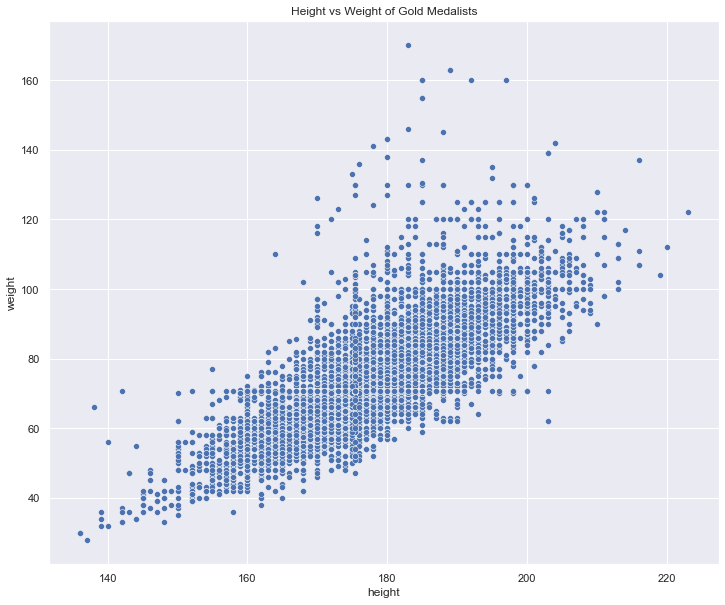

In [80]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="height", y="weight", data=new_gold_mdls)
plt.title('Height vs Weight of Gold Medalists')

The majority of dots represents a linear relatioship between height and weight. As the hieght increases weight also increases.

I just wanna see the number of athletes with more than 150kg weight

In [81]:
over_weight = new_gold_mdls.loc[new_gold_mdls['weight'] > 150]
over_weight

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
233745,118074,Lasha Talakhadze,M,22.0,197.0,160.0,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Georgia,NaN
207047,104740,Behdad Salimi Kordasiabi,M,22.0,192.0,160.0,Iran,IRI,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN
198117,100282,Hossein Reza Zadeh,M,26.0,185.0,155.0,Iran,IRI,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN
198116,100282,Hossein Reza Zadeh,M,22.0,185.0,155.0,Iran,IRI,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN
38909,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
4400,2511,Vasily Ivanovich Alekseyev,M,34.0,185.0,160.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
4399,2511,Vasily Ivanovich Alekseyev,M,30.0,185.0,160.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
266673,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
266672,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


In [82]:
over_weight['id'].count()

9

Only 9 Athletes are above 150KG, That's quite interesting as well. I am moving forward with further analysis to know more

### Let's study the Age, Height & Weight relatioship with Medal Winning's

I am only taking medal winners of United States as they got the highest number of medals in the history of olympics. to get more accurate outcome, also It is the ultimate goal of this research to get the best possible outcomes.

Moreover I am not comparing sex and win in this part as Olympics has seperate competitions for Male and Female. So no point in studying winning chance based on sex.

In [83]:
data.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
194731,98525,Maksim Sergeyevich Rakov,M,30.0,181.0,100.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Half-Heavyweight,NaN,Kazakhstan,NaN
162035,82008,"Alexandra Patricia ""Alex"" Morgan",F,27.0,173.0,62.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,NaN,USA,NaN
117646,59981,Kim Hyeon-Seop,M,31.0,175.0,53.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN,South Korea,NaN
117647,59981,Kim Hyeon-Seop,M,31.0,175.0,53.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,NaN,South Korea,NaN
38150,19756,Chang Hao,M,25.0,173.0,72.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Men's Windsurfer,NaN,Taiwan,NaN


In the below code I have used us_data as daataframe name because I initially decided to study US data then later changed it I see there is no much relationship going on, So later I did not get a chance to change everywhere. Please ignore the name for this reason

In [84]:
#us_data = data[(data.team == 'United States')]
us_data = data
us_data.tail()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
96389,49185,Fritz Hofmann,M,24.0,167.000000,56.000000,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,NaN,Germany,NaN
96390,49185,Fritz Hofmann,M,24.0,167.000000,56.000000,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Shot Put,NaN,Germany,NaN
54562,28169,Georgios Diamantis,M,24.0,175.338941,70.701618,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",NaN,Greece,NaN
135986,68911,Albin Georges Lermusiaux,M,21.0,175.338941,70.701618,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,France,NaN
69539,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,175.338941,70.701618,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Gold,Australia,NaN


In [85]:
us_data = us_data.sort_values('year', ascending=False).drop_duplicates(subset=['year', 'sport'])

In [86]:
#us_data = us_data[us_data.medal.notnull()]

In [87]:
us_data.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
194731,98525,Maksim Sergeyevich Rakov,M,30.0,181.0,100.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Half-Heavyweight,NaN,Kazakhstan,NaN
67487,34748,David Rubn Sousa Fernandes,M,32.0,181.0,82.0,Portugal,POR,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,Portugal,NaN
198600,100515,Jonelle Richards-Price,F,35.0,162.0,57.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN,New Zealand,NaN
67483,34745,Bruno Miguel Borges Fernandes,M,21.0,182.0,80.0,Portugal,POR,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,NaN,Portugal,NaN
79381,40611,Niccol Gitto,M,29.0,190.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Men's Water Polo,Bronze,Italy,NaN


I need to filter only few variables which are required for my core study, like Height, Weight, Age, Sex. In this study I wanna consider all the three medals as a win for more efficient analysis.

In [88]:
#us_data.loc["sex", "height", "weight", "medal"]
columns = ['year','season','sex', 'age', 'height', 'weight','team','event','medal','games','sport']
us_data = pd.DataFrame(us_data, columns=columns)
us_data.tail()

,year,season,sex,age,height,weight,team,event,medal,games,sport
183735,1896,Summer,M,24.0,175.338941,70.701618,Greece,Swimming Men's 500 metres Freestyle,Silver,1896 Summer,Swimming
111156,1896,Summer,M,24.0,175.338941,70.701618,Hungary,Gymnastics Men's Horizontal Bar,NaN,1896 Summer,Gymnastics
36266,1896,Summer,M,23.0,175.338941,70.701618,Greece,Tennis Men's Singles,Silver,1896 Summer,Tennis
212743,1896,Summer,M,26.0,159.000000,70.000000,Germany,"Wrestling Men's Unlimited Class, Greco-Roman",Gold,1896 Summer,Wrestling
250060,1896,Summer,M,24.0,175.338941,70.701618,Greece,"Weightlifting Men's Unlimited, One Hand",NaN,1896 Summer,Weightlifting


In [89]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 194731 to 250060
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    906 non-null    int32   
 1   season  906 non-null    category
 2   sex     906 non-null    category
 3   age     906 non-null    float64 
 4   height  906 non-null    float64 
 5   weight  906 non-null    float64 
 6   team    906 non-null    category
 7   event   906 non-null    category
 8   medal   180 non-null    category
 9   games   906 non-null    category
 10  sport   906 non-null    object  
dtypes: category(6), float64(3), int32(1), object(1)
memory usage: 112.4+ KB


In [153]:
data.describe(include='all')

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
count,269119.000000,269119,269119,269119.000000,269119.000000,269119.000000,269119,269119,269119,269119.000000,269119,269119,269119,269119,39761,268749,5031
unique,NaN,134415,2,NaN,NaN,NaN,1164,230,51,NaN,2,42,66,765,3,205,21
top,NaN,Heikki Ilmari Savolainen,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,39,194796,NaN,NaN,NaN,17508,18514,13821,NaN,220555,22216,38624,5733,13366,18514,2575
mean,68269.049279,NaN,NaN,25.366180,175.338941,70.701618,NaN,NaN,NaN,1978.735236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39028.599815,NaN,NaN,5.977013,9.311661,12.620936,NaN,NaN,NaN,29.688086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34656.000000,NaN,NaN,22.000000,170.000000,63.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68244.000000,NaN,NaN,24.000000,175.338941,70.701618,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,102117.500000,NaN,NaN,28.000000,180.000000,76.000000,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
data['sex'].describe()

count     269119
unique         2
top            M
freq      194796
Name: sex, dtype: object

In [155]:
data['age'].describe()

count    269119.000000
mean         25.366180
std           5.977013
min          10.000000
25%          22.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: age, dtype: float64

In [156]:
data['height'].describe()

count    269119.000000
mean        175.338941
std           9.311661
min         127.000000
25%         170.000000
50%         175.338941
75%         180.000000
max         226.000000
Name: height, dtype: float64

In [157]:
data['weight'].describe()

count    269119.000000
mean         70.701618
std          12.620936
min          25.000000
25%          63.000000
50%          70.701618
75%          76.000000
max         214.000000
Name: weight, dtype: float64

In [90]:
us_data['win'] = us_data['medal'].notnull()*1
us_data['win'] 
us_data.tail(10)

,year,season,sex,age,height,weight,team,event,medal,games,sport,win
49932,1900,Summer,M,26.0,175.338941,70.701618,Spain,Basque Pelota Men's Two-Man Teams With Cesta,Gold,1900 Summer,Basque Pelota,1
182196,1896,Summer,M,24.0,175.338941,70.701618,Greece,"Shooting Men's Military Rifle, 200 metres",Silver,1896 Summer,Shooting,1
211506,1896,Summer,M,23.0,175.338941,70.701618,Austria,"Fencing Men's Sabre, Individual",NaN,1896 Summer,Fencing,0
80415,1896,Summer,M,21.0,175.338941,70.701618,Greece,"Athletics Men's 1,500 metres",NaN,1896 Summer,Athletics,0
211505,1896,Summer,M,23.0,175.338941,70.701618,Austria,Cycling Men's 333 metres Time Trial,Bronze,1896 Summer,Cycling,1
183735,1896,Summer,M,24.0,175.338941,70.701618,Greece,Swimming Men's 500 metres Freestyle,Silver,1896 Summer,Swimming,1
111156,1896,Summer,M,24.0,175.338941,70.701618,Hungary,Gymnastics Men's Horizontal Bar,NaN,1896 Summer,Gymnastics,0
36266,1896,Summer,M,23.0,175.338941,70.701618,Greece,Tennis Men's Singles,Silver,1896 Summer,Tennis,1
212743,1896,Summer,M,26.0,159.000000,70.000000,Germany,"Wrestling Men's Unlimited Class, Greco-Roman",Gold,1896 Summer,Wrestling,1
250060,1896,Summer,M,24.0,175.338941,70.701618,Greece,"Weightlifting Men's Unlimited, One Hand",NaN,1896 Summer,Weightlifting,0


In [91]:
#us_data['medal'] = us_data['medal'].astype('str')
#us_data['medal'] = us_data['medal'].replace(np.nan, 0)
#us_data['medal'] = us_data['medal'].astype('category')
#us_data.tail()

In [92]:
us_data['win'] = us_data['win'].astype('int')
us_data['medal'] = us_data['medal'].astype('category')
#us_data['medal'] = us_data['medal'].astype('str')
us_data.dtypes

year         int32
season    category
sex       category
age        float64
height     float64
weight     float64
team      category
event     category
medal     category
games     category
sport       object
win          int32
dtype: object

##### Comparing between season and sex

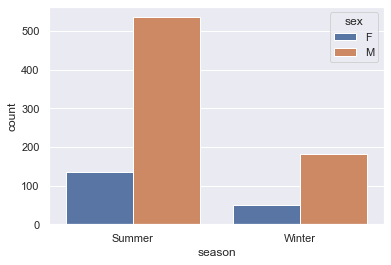

In [93]:
sns.countplot(x='season',hue='sex',data=us_data)
plt.show()

From the above graph It's clear to see more men are participating in both seasons than women and also the ration is almost same in both seasons.

Best way to check 2 categorical varible is to make cross tab. seems to be there is no much relationship going on between season and sex.

In [94]:
sex_season = pd.crosstab(index=us_data['sex'], columns=us_data["season"],
margins=True)
sex_season

season,Summer,Winter,All
sex,,,
F,136,51,187
M,536,183,719
All,672,234,906


##### Comparing between season and age

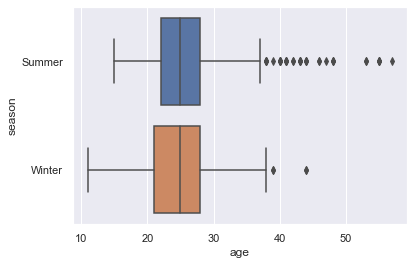

In [95]:
sns.boxplot(x='age',y='season',data=us_data)
plt.show()

Medians are almost same and IQR's are completely overlapping. no much relation going on

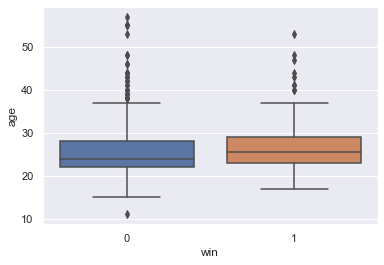

In [96]:
sns.boxplot(x="win",y="age", data=us_data)
plt.show()

<p style="color:green">The median age for win is more that median age of no-win. Also IQR's are not completely overlapping. I think there must be a relation between age and win

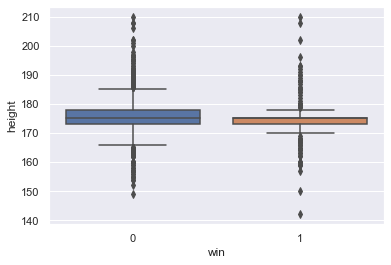

In [97]:
sns.boxplot(x="win",y="height", data=us_data)
plt.show()

Again the median for win and no win seems to be almost equal. And the IQR's are completely overlapping. Could not find any relation going on here, also it seems to have most winnings lies between 168 to 184 Height.

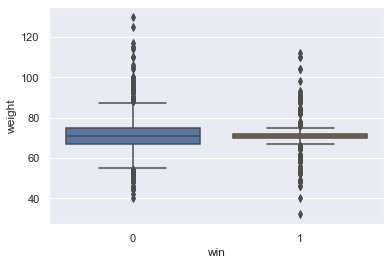

In [98]:
sns.boxplot(x="win",y="weight", data=us_data)
plt.show()

Between Sex and Win , There is no much relatioship going on here. As both IQR's are completely overlapping and also medians are same for both.

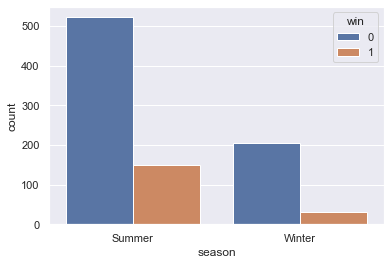

In [99]:
sns.countplot(x='season',hue='win',data=us_data)
plt.show()

Between Seaon and Win , There is no much relatioship going on here. As both counts are showing equal proportions.

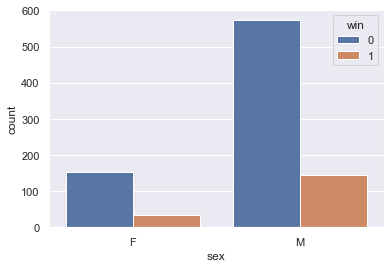

In [100]:
sns.countplot(x='sex',hue='win',data=us_data)
plt.show()

In this graph we can see for male and female win rates are in equal proportion. no relationship much found between them.

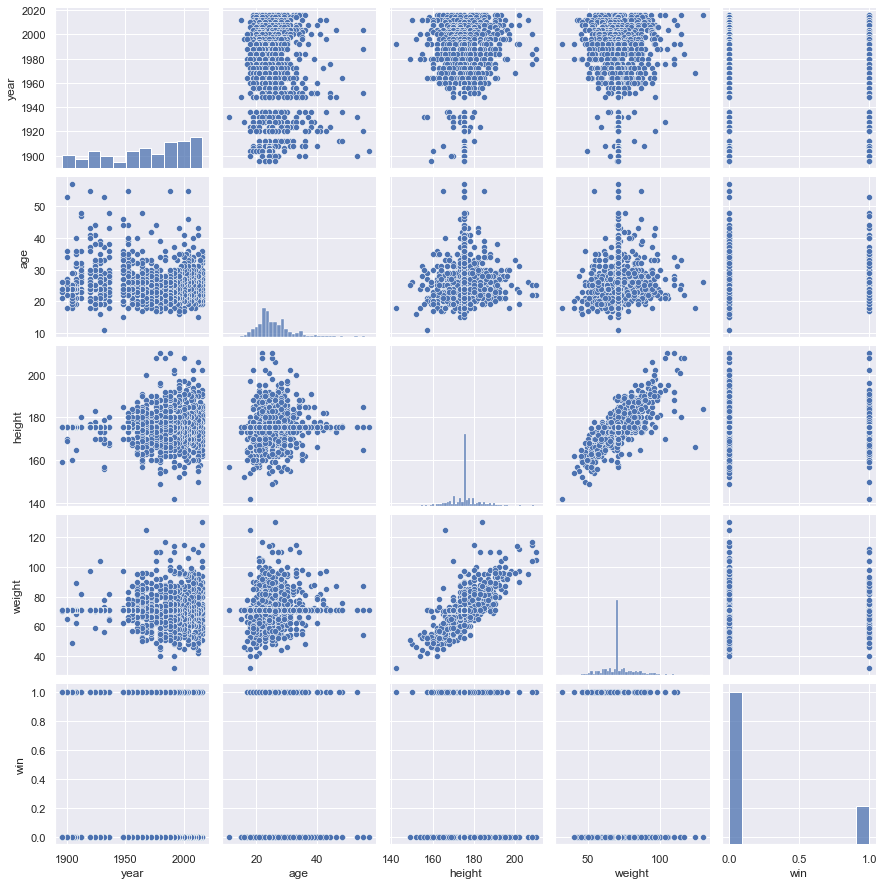

In [101]:
#multivariate
sns.pairplot(us_data)
plt.show()

From the above graph I can see there is only one linear relation going on between height and weight

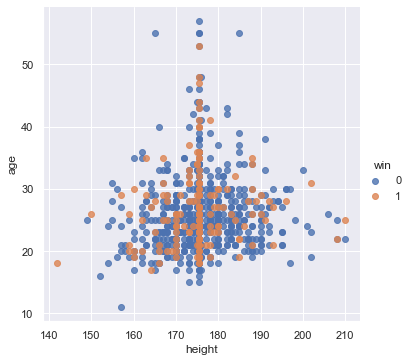

In [102]:
sns.lmplot(x='height',y='age',hue='win',data=us_data,fit_reg=False)
plt.show()

No much relationship found between age height & win. spead was almost rough. But I can see a clustering happening in 175 Height. I believe most of the US athletes participated in Olympics are of 175cm height.

In [103]:
us_data = pd.DataFrame(us_data)
rank = us_data['medal'] 
us_data['rank'] = rank
us_data['rank'] = us_data['rank'].replace(['Gold','Silver','Bronze'], [1, 2, 3])

In [104]:
us_data['rank'] = us_data['rank'].replace('?', np.NaN)

us_data['games'] = us_data['games'].astype('str')

In [105]:

us_data['rank'].head()

194731    NaN
67487     NaN
198600    NaN
67483     NaN
79381     3.0
Name: rank, dtype: float64

In [106]:
us_data.dtypes

year         int32
season    category
sex       category
age        float64
height     float64
weight     float64
team      category
event     category
medal     category
games       object
sport       object
win          int32
rank       float64
dtype: object

In [107]:
us_data.head(15)

,year,season,sex,age,height,weight,team,event,medal,games,sport,win,rank
194731,2016,Summer,M,30.0,181.0,100.0,Kazakhstan,Judo Men's Half-Heavyweight,NaN,2016 Summer,Judo,0,NaN
67487,2016,Summer,M,32.0,181.0,82.0,Portugal,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,2016 Summer,Canoeing,0,NaN
198600,2016,Summer,F,35.0,162.0,57.0,New Zealand,"Equestrianism Mixed Three-Day Event, Team",NaN,2016 Summer,Equestrianism,0,NaN
67483,2016,Summer,M,21.0,182.0,80.0,Portugal,Football Men's Football,NaN,2016 Summer,Football,0,NaN
79381,2016,Summer,M,29.0,190.0,90.0,Italy,Water Polo Men's Water Polo,Bronze,2016 Summer,Water Polo,1,3.0
79395,2016,Summer,M,25.0,185.0,82.0,Canada,Badminton Men's Singles,NaN,2016 Summer,Badminton,0,NaN
25775,2016,Summer,M,28.0,180.0,67.0,Belgium,Athletics Men's 4 x 400 metres Relay,NaN,2016 Summer,Athletics,0,NaN
189295,2016,Summer,F,21.0,163.0,55.0,Italy,Swimming Women's 200 metres Butterfly,NaN,2016 Summer,Swimming,0,NaN
189365,2016,Summer,F,30.0,180.0,84.0,United States,Rowing Women's Coxed Eights,Gold,2016 Summer,Rowing,1,1.0
28742,2016,Summer,M,26.0,167.0,60.0,Germany,Gymnastics Men's Individual All-Around,NaN,2016 Summer,Gymnastics,0,NaN


In [108]:
us_data.dtypes

year         int32
season    category
sex       category
age        float64
height     float64
weight     float64
team      category
event     category
medal     category
games       object
sport       object
win          int32
rank       float64
dtype: object

In [109]:
us_data['rank'].isnull().sum().sum()

726

As I already made graphs above between different variables, I can refer them to decide between their replationship

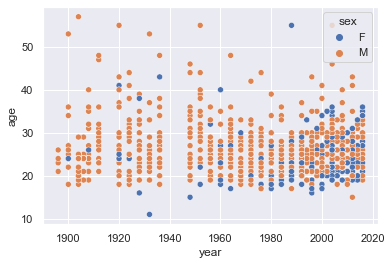

In [110]:
sns.scatterplot(x='year',y='age',hue='sex',data=us_data)
plt.show()

From the above graph random spread has been found, no clustering identified

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Logistic Regression</b><br><br>
As previously mentioned, my response variable is win . <i>My research Question is what Influences the chances of getting a medal in Olympics</i>
<br><br>

In [111]:
from statsmodels.formula.api import logit
logit_model=logit('win~ age+height+weight+ C(season)',us_data).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.491222
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit             Pseudo R-squared:  0.015    
Dependent Variable:  win               AIC:               900.0937 
Date:                2021-12-12 13:14  BIC:               924.1389 
No. Observations:    906               Log-Likelihood:    -445.05  
Df Model:            4                 LL-Null:           -451.70  
Df Residuals:        901               LLR p-value:       0.0099058
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      6.0000                                        
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           -0.0807   2.3902 -0.0338 0.9731 -4.7654  4.6040
C(season)[T.Winter] -0.6559   0.2175 -3.0161 0.0026 -1.0821 -0.2297
age                  0.0185   0.0135  1.3756 0.1689 -0.0079  0.0450
height              -0.0086   0.0168 -0.5114 0.6091 -0.0416  0.0244
weight              -0.0020   0.0119 -0.1669 0.8675 -0.0252  0.0213
===================================================================

"""

<b>I am trying to predict probability of win </b>

I have removed sex from this regression as there is seperate competitions for male and female. Olympics is not a unisex competition, so no sense on testing it's probability.

<i>pi here is probability of win</i>

logit(pi)=log(success odd of win) = log (pi/(1-pi)) = -0.0807 - 0.6559 winterseason + 0.0185 age - 0.0086 height - 0.0020 weight	

Intercept - everything else is zero Probability of success

In [112]:
np.exp(-0.0807)

0.9224703910549078

Estimated success odds for win 0.922 in summer season from a team with 0 age with 0 height and 0 weight

In [113]:
np.exp(-0.6559)

0.5189747750416571

Estimated success odds for win change by factor of 0.518 when you change from summer to winter with 0 age with 0 height and 0 weight

In [114]:
np.exp(0.0185)

1.018672185169575

Estimated success odds for win change by factor of 1.018 when change age change by 1 in summer/winter with 0 height and 0 weight

In [115]:
np.exp(-0.0086)

0.9914368742181953

Estimated success odds for win change by factor of 0.991 when you change height by 1 unit in winter/summer with 0 age and 0 weight

In [116]:
np.exp(-0.0020)

0.9980019986673331

Estimated success odds for win change by factor of 0.998 when you change weight by 1 unit in winter/summer with 0 age and 0 height

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>conclusion</b>
    
All terms are significantly different 0 (i.e. they do not have a relationship with win) bar season (p=0.0026<0.05) LRT 
                                                                                                                   
comparing to null model, p-value = 0.0099058 < 0.05 so reject H0 that the Null model is preferred <br><br></div>

We were testing the Null Hypothesis H0, so even when we take the exponensial 

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between athletes with age of 35 or more/less and win

H1: There is significant relation between athletes with age of 35 or more/less and win
<br><br></div> 

In [117]:
old_win = us_data[us_data['age'] > 35 ]['win']
young_win = us_data[us_data['age'] < 35 ]['win']

##### Ranksum Test

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>Conclusion of Age and Win relatioship</b>

As per the <b>P Value - 0.62</b> which I got from the Ranksum Test is <b>greater than 0.05</b>, So I can reject the Null Hypothesis.

We can say there is a significant relation between athletes with age of 35 or more/less and win. It is proved in the above test. <br> <br> </div>

In [118]:
from scipy.stats import ranksums
ranksums(old_win,young_win)

RanksumsResult(statistic=0.48694673646368175, pvalue=0.6262960773090279)

##### Ranksum Test

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between Height and win

H1: There is significant relation between Height and win
<br><br></div>

In [119]:
tall_win = us_data[us_data['height'] > 150 ]['win']
short_win = us_data[us_data['height'] == 150 ]['win']

In [120]:
from scipy.stats import ranksums
ranksums(tall_win,short_win)

RanksumsResult(statistic=-1.3890902696789948, pvalue=0.16480530221911405)

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>Conclusion of Weight and Win relationship</b>

As per the <b>P Value = 0.16</b> which I got from the Ranksum Test is <b>greater than 0.05</b>, So I can reject the Null Hypothesis.

We can say there is a significant relation between Height and win. It is proved in the above test. <br> <br> </div>

##### Ranksum Test

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between Weight and win

H1: There is significant relation between Weight and win
<br><br></div>

In [121]:
ok_w = us_data[us_data['weight'] <60]['win']
nok_w = us_data[us_data['weight'] >60]['win']

In [122]:
from scipy.stats import ranksums
ranksums(ok_w,nok_w)

RanksumsResult(statistic=-0.10148076190990243, pvalue=0.9191688284845534)

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>Conclusion of Weight and Win relationship</b>

As per the <b>P Value = 0.91</b> which I got from the Ranksum Test is <b>greater than 0.05</b>, So I can reject the Null Hypothesis.

We can say there is a significant relation between Weight and win. It is proved in the above test. <br> <br> </div>

In [123]:
us_data['win'] = us_data['win'].astype('category')

I am considering 1 as win and 0 as no win, this variable is created from medal columns and used yes or no logic for converting if there is a value present then change it to 'one' if not 'zero'.

During my test , I could not see any significant linear relaion between age, height ,weight and win. So I am now going to look  deeper into hight jump win and age,height, weight.

##### Test on Wrestling

In [124]:
wre_data = us_data[(us_data.sport == "Wrestling")]

In [125]:
wre_data = wre_data.reset_index(drop=True)

In [126]:
wre_data.head()

,year,season,sex,age,height,weight,team,event,medal,games,sport,win,rank
0,2016,Summer,M,22.0,165.0,86.0,Egypt,"Wrestling Men's Light-Heavyweight, Freestyle",NaN,2016 Summer,Wrestling,0,NaN
1,2012,Summer,F,31.0,155.0,53.0,Senegal,"Wrestling Women's Flyweight, Freestyle",NaN,2012 Summer,Wrestling,0,NaN
2,2008,Summer,M,27.0,178.0,74.0,Algeria,"Wrestling Men's Middleweight, Greco-Roman",NaN,2008 Summer,Wrestling,0,NaN
3,2004,Summer,F,36.0,162.0,48.0,Tajikistan,"Wrestling Women's Flyweight, Freestyle",NaN,2004 Summer,Wrestling,0,NaN
4,2000,Summer,M,26.0,170.0,69.0,Japan,"Wrestling Men's Welterweight, Greco-Roman",Silver,2000 Summer,Wrestling,1,2.0


##### Chi-squared test

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between Height and win

H1: There is significant relation between Height and win
<br><br></div>

In [127]:
chi2_contingency = pd.crosstab(index = wre_data['win'],columns=wre_data['height'], margins= True)
chi2_contingency

height,149.0,155.0,159.0,162.0,163.0,165.0,166.0,167.0,168.0,170.0,175.33894093995372,178.0,180.0,192.0,All
win,,,,,,,,,,,,,,,
0,1,1,0,1,0,1,2,1,1,1,9,1,1,1,21
1,0,0,2,0,1,0,0,1,0,1,2,0,0,0,7
All,1,1,2,1,1,1,2,2,1,2,11,1,1,1,28


In [128]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(index=wre_data['win'], columns=wre_data["height"]))

(13.93939393939394,
 0.37812598765008776,
 13,
 array([[0.75, 0.75, 1.5 , 0.75, 0.75, 0.75, 1.5 , 1.5 , 0.75, 1.5 , 8.25,
         0.75, 0.75, 0.75],
        [0.25, 0.25, 0.5 , 0.25, 0.25, 0.25, 0.5 , 0.5 , 0.25, 0.5 , 2.75,
         0.25, 0.25, 0.25]]))

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><br><b>Conclusion of Weight and Win relationship</b><br><br>pvalue = 0.378 > 0.05 there is no relation between height and win<br><br></div>

In [129]:
bskt_data = us_data[(us_data.sport == "Basketball")]

In [130]:
bskt_data = bskt_data.reset_index(drop=True)

In [131]:
bskt_data.head()

,year,season,sex,age,height,weight,team,event,medal,games,sport,win,rank
0,2016,Summer,F,22.0,170.0,57.0,Canada,Basketball Women's Basketball,NaN,2016 Summer,Basketball,0,NaN
1,2012,Summer,M,26.0,206.0,95.0,China,Basketball Men's Basketball,NaN,2012 Summer,Basketball,0,NaN
2,2008,Summer,F,29.0,170.0,65.0,Brazil,Basketball Women's Basketball,NaN,2008 Summer,Basketball,0,NaN
3,2004,Summer,F,27.0,181.0,78.0,Spain,Basketball Women's Basketball,NaN,2004 Summer,Basketball,0,NaN
4,2000,Summer,M,25.0,208.0,115.0,New Zealand,Basketball Men's Basketball,NaN,2000 Summer,Basketball,0,NaN


<b>Chi-squared test for basketball</b>

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between Height and win

H1: There is significant relation between Height and win
<br><br></div>

In [132]:
chi2_contingency = pd.crosstab(index = bskt_data['win'],columns=bskt_data['height'], margins= True)
chi2_contingency

height,170.0,175.0,175.33894093995372,179.0,181.0,187.0,188.0,189.0,190.0,200.0,206.0,208.0,210.0,All
win,,,,,,,,,,,,,,
0,2,1,3,1,1,1,1,0,1,1,1,2,0,15
1,0,1,0,0,0,0,0,1,0,0,0,1,1,4
All,2,2,3,1,1,1,1,1,1,1,1,3,1,19


In [133]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(index=bskt_data['win'], columns=bskt_data["height"]))

(11.980555555555558,
 0.44724251769223977,
 12,
 array([[1.57894737, 1.57894737, 2.36842105, 0.78947368, 0.78947368,
         0.78947368, 0.78947368, 0.78947368, 0.78947368, 0.78947368,
         0.78947368, 2.36842105, 0.78947368],
        [0.42105263, 0.42105263, 0.63157895, 0.21052632, 0.21052632,
         0.21052632, 0.21052632, 0.21052632, 0.21052632, 0.21052632,
         0.21052632, 0.63157895, 0.21052632]]))

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><br><b>Conclusion of Weight and Win relationship</b><br><br>pvalue = 0.447 > 0.05 there is a relation between height and win<br><br></div>

#### Bokeh Plot for more interactive analysis

In [134]:
# output to static HTML file
output_file("us_olympics_data_output.html")
# NEW: create a column data source for the plots to share
source = ColumnDataSource(data=dict(x1=us_data.height[us_data.win == 1], x2=us_data.height[us_data.win ==0 ], y = us_data['age']))
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"
# create a new plot and add a renderer
left = figure(tools=TOOLS, width=550, height=550)
left.circle('x1', 'y', source=source)
# configure visual properties on a plot's title attribute
left.title.text = "Olympics age,height and win"
left.title.align = "right"
left.title.text_color = "#b8660f"
left.title.text_font_size = "25px"
left.title.background_fill_color = "#fff"
left.xaxis.axis_label = 'height'
left.yaxis.axis_label = 'age'

# put the subplots in a gridplot
p = gridplot([[left]])

# show the results
show(p)

Based on the above graph we can see there is only one relationship is seen between height and weight. what we are trying to find in this study is the medal winning 

My response variable is Medal Winning as we are trying to find out is there any relatioship between height, weight & age with medal winnings which I already know and what is difficult to find is the winning of a medal

<p style="color: green;">As per the above graph It's visible the median is different for win and loss, also there is no overlap. I think there is a relationship between weight and win.</p>

### Evolution of the Olympics over time

I am here trying to figure out 3 main things
<ul>
<li>How Participation of Male/Female Athletes varied over time</li>
<li>How Men-Women proportion varied over time</li>
<li>Mean age, Height & Weight varied over time</li>
</ul>

##### Participation of Male Female Athletes

In [135]:
men_over_time = data[(data.sex == 'M') & (data.season == 'Summer')]
women_over_time = data[(data.sex == 'F') & (data.season == 'Summer')]

In [136]:
men_over_time.tail()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
96389,49185,Fritz Hofmann,M,24.0,167.000000,56.000000,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,NaN,Germany,NaN
96390,49185,Fritz Hofmann,M,24.0,167.000000,56.000000,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Shot Put,NaN,Germany,NaN
54562,28169,Georgios Diamantis,M,24.0,175.338941,70.701618,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",NaN,Greece,NaN
135986,68911,Albin Georges Lermusiaux,M,21.0,175.338941,70.701618,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,France,NaN
69539,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,175.338941,70.701618,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Gold,Australia,NaN


I will be crearing plot first for Men & women seperate

Text(0.5, 1.0, 'Variation of Male Athletes over time')

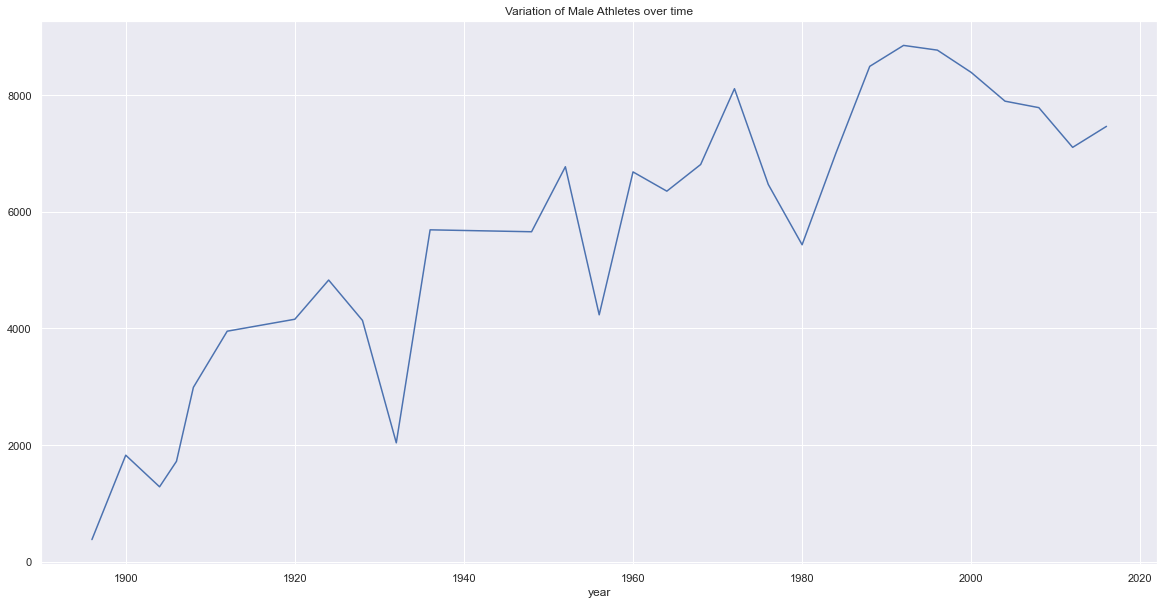

In [137]:
part = men_over_time.groupby('year')['sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Male athletes patricipation has been increased over time.

Text(0.5, 1.0, 'Variation of Female Athletes over time')

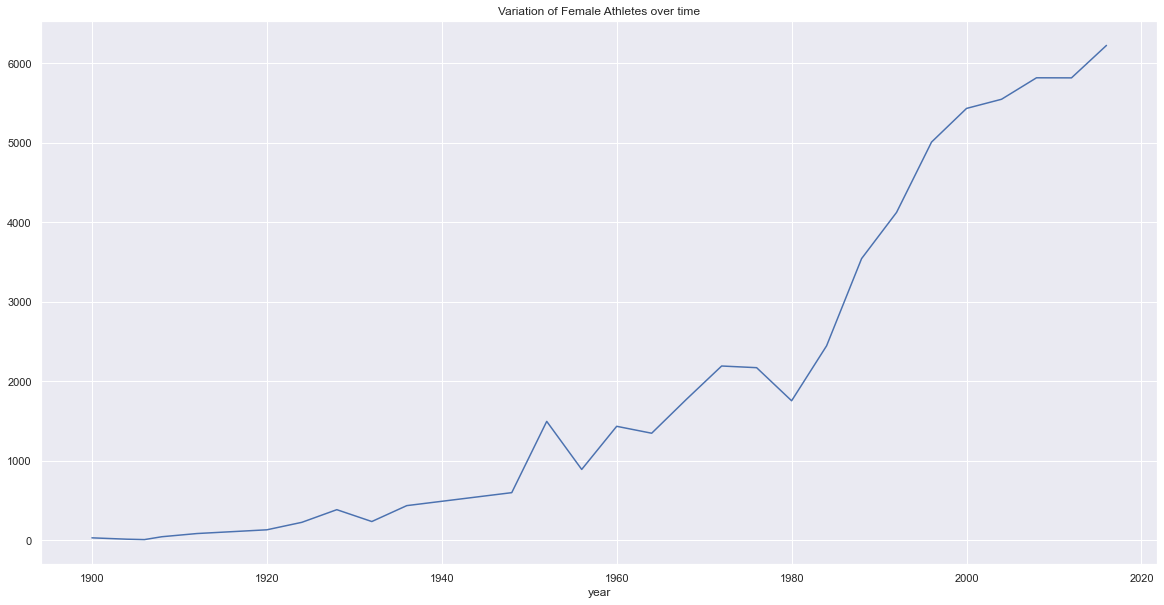

In [138]:
part = women_over_time.groupby('year')['sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

As we seen in previous example participation of female athlete has also increased over time.

##### Variation of age along time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

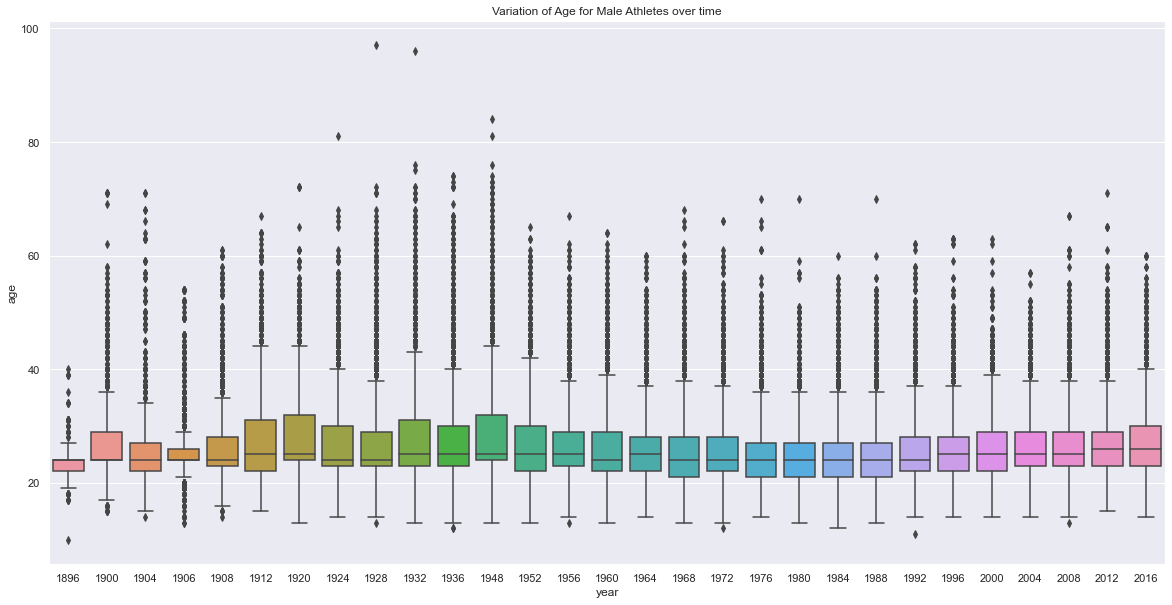

In [139]:
plt.figure(figsize=(20, 10))
sns.boxplot('year', 'age', data=men_over_time)
plt.title('Variation of Age for Male Athletes over time')


 <br><b>It's interesting to see the age of some athletes varied between 1924 and 1948. Just wanna see the details of athletes more than 80 Years old <br><br>

In [140]:
men_over_time.loc[men_over_time['age'] > 80].head(15)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
153571,77710,Robert Tait McKenzie,M,81.0,175.338941,70.701618,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
9345,5146,George Denholm Armour,M,84.0,175.338941,70.701618,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
97303,49663,Winslow Homer,M,96.0,175.338941,70.701618,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
255166,128719,John Quincy Adams Ward,M,97.0,175.338941,70.701618,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN
235161,118789,Louis Tauzin,M,81.0,175.338941,70.701618,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN


<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br>As Per the data we have it's clear that the competitions of these older athletes(aged more than 80) were art related. I never knew that art was part of olympics, so I had to do some research.

[From Wikipedia](https://en.wikipedia.org/wiki/Art_competitions_at_the_Summer_Olympics)

Art competitions originated as part of the modern Olympic Games during its early years, from 1912 to 1948. The competitions were part of the original intention of the Olympic Movement's founder, Pierre de Frédy, Baron de Coubertin. Medals were awarded for works of art inspired by sports, divided into five categories: architecture, literature, music, painting, and sculpture.
The juried art competitions were abandoned in 1954 because artists were considered to be professionals, while Olympic athletes were required to be amateurs. Since 1956, the Olympic cultural programme has taken their place.<br><br>

##### Variation of Height over time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

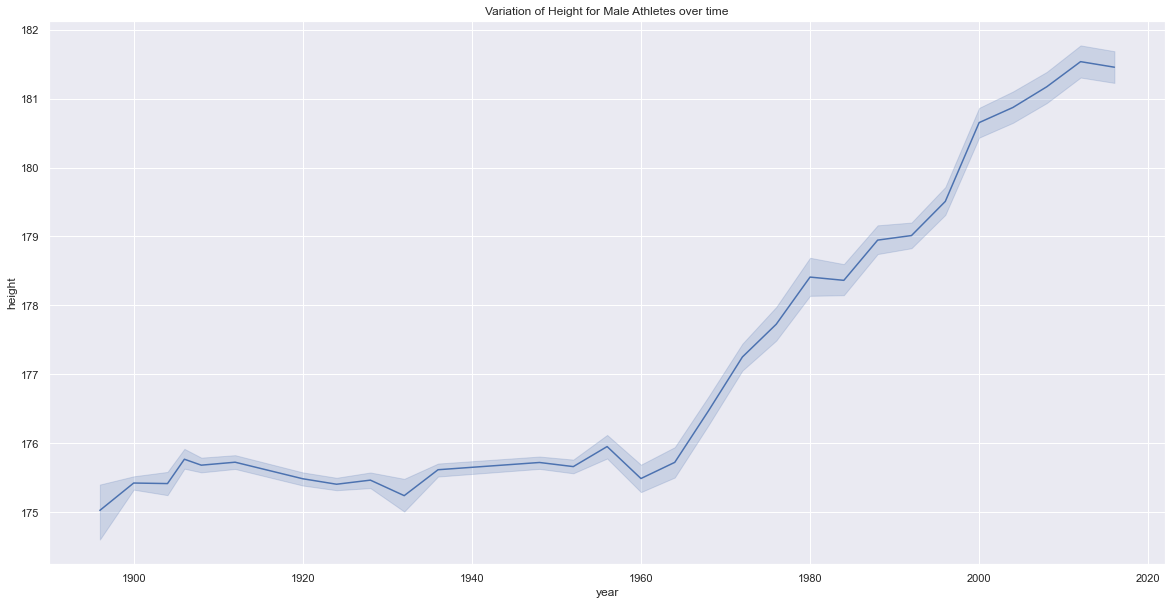

In [145]:
plt.figure(figsize=(20, 10))
sns.lineplot('year', 'height', data=men_over_time)
plt.title('Variation of Height for Male Athletes over time')

It's 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Female Athletes Height Variation over time')

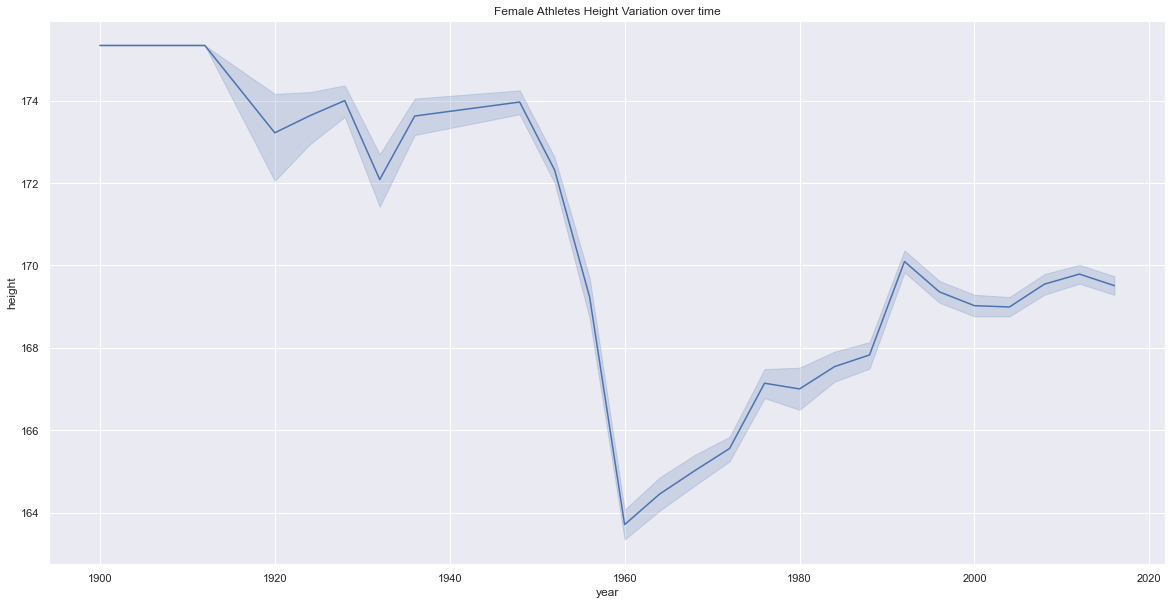

In [142]:
plt.figure(figsize=(20, 10))
sns.lineplot('year', 'height', data=women_over_time)
plt.title('Female Athletes Height Variation over time')

It's clear from the data that men height increased over time. for female athletes there was a decrease in height from 1900 to 1960 then it gradually increased